In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
# plt.style.use("seaborn-pastel")
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel(r"C:\Users\STARHIVE\Downloads\Olympics Medals.xlsx")
df.columns=["Age","Silver","Bronze","Athlete","Date","Gold","Sport"]
df.head()

,Age,Silver,Bronze,Athlete,Date,Gold,Sport
0,23,0,0,Michael Phelps,2008-08-24,8,Swimming
1,19,0,2,Michael Phelps,2004-08-29,6,Swimming
2,27,2,0,Michael Phelps,2012-08-12,4,Swimming
3,25,2,3,Natalie Coughlin,2008-08-24,1,Swimming
4,24,1,3,Aleksey Nemov,2000-10-01,2,Gymnastics


In [61]:
df.columns.tolist()

['Age', 'Silver', 'Bronze', 'Athlete', 'Date', 'Gold', 'Sport']

In [62]:
# Check data types
print(df.dtypes)
print(df['Athlete'])




Age                 int64
Silver              int64
Bronze              int64
Athlete            object
Date       datetime64[ns]
Gold                int64
Sport              object
dtype: object
0                Michael Phelps
1                Michael Phelps
2                Michael Phelps
3              Natalie Coughlin
4                 Aleksey Nemov
5                 Alicia Coutts
6                Missy Franklin
7                   Ryan Lochte
8               Allison Schmitt
9              Natalie Coughlin
10                   Ian Thorpe
11                  Dara Torres
12                Cindy Klassen
13                Nastia Liukin
14                Marit Bjørgen
15                     Sun Yang
16              Kirsty Coventry
17           Libby Lenton-Trick
18                  Ryan Lochte
19               Inge de Bruijn
20                Petria Thomas
21                   Ian Thorpe
22               Inge de Bruijn
23                Gary Hall Jr.
24                 Michael Klim
25  

In [63]:
# Display unique values in 'Gold' column to find non-numeric entries
print(df['Gold'].unique())

[8 6 4 1 2 3]


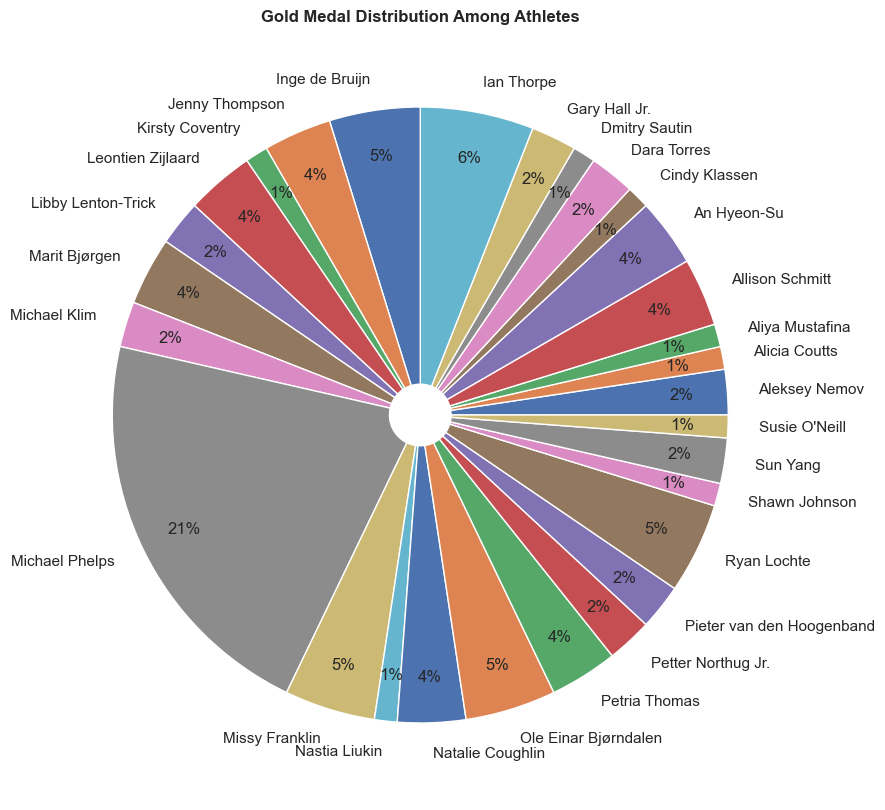

In [64]:
med=df['Gold'].median()

df['Gold'] = pd.to_numeric(df['Gold'], errors='coerce').fillna(med).astype(int)
# Group by 'Athlete' and sum the 'Gold' medals
gold_counts = df.groupby("Athlete")['Gold'].sum()

# Remove entries with 0 Gold medals for plotting
gold_counts = gold_counts[gold_counts > 0]

# Plotting the pie chart
gold_counts.plot(kind="pie",
                 autopct="%.0f%%",  # Percentage format
                 figsize=(10, 10),  # Size of the figure
                 wedgeprops=dict(width=0.9),  # Thickness of the pie
                 pctdistance=0.85)  # Position of percentage labels

# Formatting the plot
plt.ylabel('')  # Removing y-axis label
plt.title("Gold Medal Distribution Among Athletes", fontweight="bold")  # Title

# Display the plot
plt.show()

In [65]:
pt=df.pivot_table(values="Gold",index="Date", columns="Athlete")
print(pt)
pt.isnull().sum() 

Athlete     Aleksey Nemov  Alicia Coutts  Aliya Mustafina  Allison Schmitt  \
Date                                                                         
2000-10-01            2.0            NaN              NaN              NaN   
2002-02-24            NaN            NaN              NaN              NaN   
2004-08-29            NaN            NaN              NaN              NaN   
2006-02-26            NaN            NaN              NaN              NaN   
2008-08-24            NaN            NaN              NaN              NaN   
2010-02-28            NaN            NaN              NaN              NaN   
2012-08-12            NaN            1.0              1.0              3.0   

Athlete     An Hyeon-Su  Cindy Klassen  Dara Torres  Dmitry Sautin  \
Date                                                                 
2000-10-01          NaN            NaN          2.0            1.0   
2002-02-24          NaN            NaN          NaN            NaN   
2004-08-29       

Athlete
Aleksey Nemov                6
Alicia Coutts                6
Aliya Mustafina              6
Allison Schmitt              6
An Hyeon-Su                  6
Cindy Klassen                6
Dara Torres                  6
Dmitry Sautin                6
Gary Hall Jr.                6
Ian Thorpe                   5
Inge de Bruijn               5
Jenny Thompson               6
Kirsty Coventry              6
Leontien Zijlaard            6
Libby Lenton-Trick           6
Marit Bjørgen                6
Michael Klim                 6
Michael Phelps               4
Missy Franklin               6
Nastia Liukin                6
Natalie Coughlin             5
Ole Einar Bjørndalen         6
Petria Thomas                6
Petter Northug Jr.           6
Pieter van den Hoogenband    6
Ryan Lochte                  5
Shawn Johnson                6
Sun Yang                     6
Susie O'Neill                6
dtype: int64

In [66]:
pt.columns[pt.isnull().sum() == 0]

Index([], dtype='object', name='Athlete')

In [67]:
# Clean 'Date' column and set as index
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure 'Date' column is datetime
    df.set_index('Date', inplace=True)
else:
    print("The 'Date' column is not present in the DataFrame.")

# Continue processing if 'Date' was set as index
if 'Date' in df.index.names:
    numeric_df = df.select_dtypes(include=['number'])
    numeric_df = numeric_df.interpolate(method="linear").fillna(method="bfill")
    result_df = numeric_df.join(df.select_dtypes(exclude=['number']))
    cumulative_df = numeric_df.cumsum()
    print(cumulative_df)
else:
    print("Further processing is halted due to missing 'Date' index.")

            Age  Silver  Bronze  Gold
Date                                 
2008-08-24   23       0       0     8
2004-08-29   42       0       2    14
2012-08-12   69       2       2    18
2008-08-24   94       4       5    19
2000-10-01  118       5       8    21
2012-08-12  142       8       9    22
2012-08-12  159       8      10    26
2012-08-12  186      10      11    28
2012-08-12  208      11      12    31
2004-08-29  229      13      13    33
2000-10-01  246      15      13    36
2000-10-01  279      15      16    38
2006-02-26  305      17      18    39
2008-08-24  323      20      19    40
2010-02-28  352      21      20    43
2012-08-12  372      22      21    45
2008-08-24  396      25      21    46
2008-08-24  419      26      22    48
2008-08-24  443      26      24    50
2004-08-29  473      27      26    51
2004-08-29  501      28      26    54
2004-08-29  522      29      27    56
2000-10-01  549      30      27    59
2000-10-01  574      31      28    61
2000-10-01  

In [68]:
from matplotlib.animation import FuncAnimation, PillowWriter

sns.set(style="darkgrid")

# Load the data
df = pd.read_excel(r"C:\Users\STARHIVE\Downloads\Olympics Medals.xlsx")
df.columns = ["Age", "Silver", "Bronze", "Athlete", "Date", "Gold", "Sport"]

# Convert 'Gold' column to numeric, fill non-numeric with median, and ensure it's int
med = df['Gold'].median()
df['Gold'] = pd.to_numeric(df['Gold'], errors='coerce').fillna(med).astype(int)

# Set 'Date' column as the index and ensure it's datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

# Calculate cumulative gold medals
cumulative_df = df.groupby([df.index, 'Athlete'])['Gold'].sum().groupby(level=1).cumsum().unstack().fillna(0)

# Selecting top 20 athletes based on cumulative gold medals
selected = cumulative_df.iloc[-1].sort_values(ascending=False)[:20].index
data = cumulative_df[selected].round()

fig, ax = plt.subplots(figsize=(9.3, 5))
fig.subplots_adjust(left=0.25)
no_of_frames = data.shape[0]

bars = sns.barplot(y=data.columns, x=data.iloc[0], orient="h", ax=ax)
ax.set_xlim(0, data.max().max() * 1.1)
txts = [ax.text(0, i, 0, va="center") for i in range(data.shape[1])]
title_txt = ax.text(data.max().max() * 0.5, -1, "Date: ", fontsize=12)

def animate(i):
    y = data.iloc[i, :]
    title_txt.set_text(f"Date: {data.index[i].date()}")
    for j, b in enumerate(bars.patches):
        b.set_width(y.iloc[j])
        txts[j].set_text(f"{y.iloc[j].astype(int)}")
        txts[j].set_x(y.iloc[j] + data.max().max() * 0.01)

anim = FuncAnimation(fig, animate, repeat=False, frames=no_of_frames, interval=100, blit=False)
anim.save('athletes.gif', writer=PillowWriter(fps=30))
plt.close(fig)


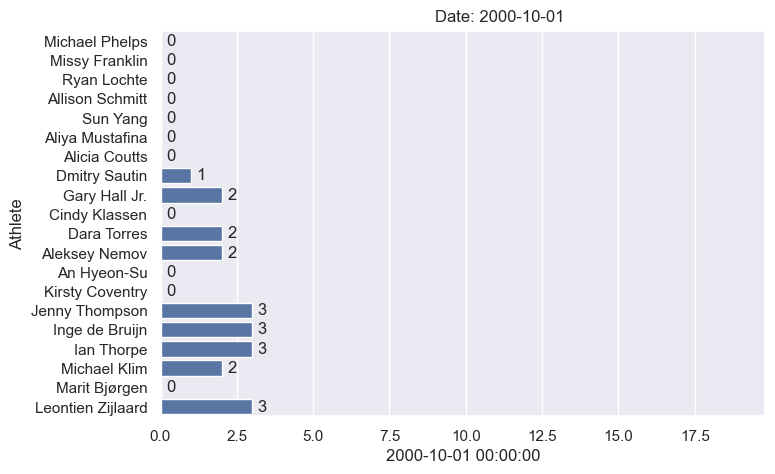

In [69]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sns.set(style="darkgrid")

# Load the data
df = pd.read_excel(r"C:\Users\STARHIVE\Downloads\Olympics Medals.xlsx")
df.columns = ["Age", "Silver", "Bronze", "Athlete", "Date", "Gold", "Sport"]

# Convert 'Gold' column to numeric, fill non-numeric with median, and ensure it's int
med = df['Gold'].median()
df['Gold'] = pd.to_numeric(df['Gold'], errors='coerce').fillna(med).astype(int)

# Set 'Date' column as the index and ensure it's datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

# Calculate cumulative gold medals
cumulative_df = df.groupby([df.index, 'Athlete'])['Gold'].sum().groupby(level=1).cumsum().unstack().fillna(0)

# Selecting top 20 athletes based on cumulative gold medals
selected = cumulative_df.iloc[-1].sort_values(ascending=False)[:20].index
data = cumulative_df[selected].round()

fig, ax = plt.subplots(figsize=(9.3, 5))
fig.subplots_adjust(left=0.25)
no_of_frames = data.shape[0]

bars = sns.barplot(y=data.columns, x=data.iloc[0], orient="h", ax=ax)
ax.set_xlim(0, data.max().max() * 1.1)
txts = [ax.text(0, i, 0, va="center") for i in range(data.shape[1])]
title_txt = ax.text(data.max().max() * 0.5, -1, "Date: ", fontsize=12)

def animate(i):
    y = data.iloc[i, :]
    title_txt.set_text(f"Date: {data.index[i].date()}")
    for j, b in enumerate(bars.patches):
        b.set_width(y.iloc[j])
        txts[j].set_text(f"{y.iloc[j].astype(int)}")
        txts[j].set_x(y.iloc[j] + data.max().max() * 0.01)

anim = FuncAnimation(fig, animate, repeat=True, frames=no_of_frames, interval=100, blit=False)

# Display the animation in the Jupyter notebook
HTML(anim.to_jshtml())
